In [176]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
from scipy import stats
import cobra

In [177]:
#definir modelo 
model = cobra.io.read_sbml_model("../recon3d_6rx.xml") #modelo recon3d + 6rx de acetilacion 
#matriz que contiene los datos del eje "y" -Estudio Shen
mat = scipy.io.loadmat('/home/bguzman/jupyter/UI/fba/supplementary_software_code.mat') #aqui se encuentra "acetlevellistval"
acetlevel=mat["acetlevellistval"] #acetlevellistval es la lista de valores de acetilacion (eje y)

In [178]:
model

Name,Recon3D
Memory address,0x07fabbd97ca00
Number of metabolites,5839
Number of reactions,10606
Number of groups,0
Objective expression,1.0*BIOMASS_maintenance - 1.0*BIOMASS_maintenance_reverse_5b3f9
Compartments,"cytosol, lysosome, mitochondria, endoplasmic reticulum, extracellular space, peroxisome/glyoxysome, nucleus, golgi apparatus, inner mitochondrial compartment"


In [192]:
#Aquí cargamos los archivos resultantes con los flujos provenientes de Pheflux como diccionario
A549= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/A549_LUNG_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HCT116= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HCT116_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HL60= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solved_To_Acceptable_Level.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MCF7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/MCF7_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MDAMB231= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/MDAMB231_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
NB4= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PANC1= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PANC1_PANCREAS_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PC3= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PC3_PROSTATE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SAOS2= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/SAOS2_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SW480= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/SW480_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U2OS= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U2OS_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U251MG= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U251MG_CENTRAL_NERVOUS_SYSTEM_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U937= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HUH7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HUH7_LIVER_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()

In [193]:
#Cada archivo contiene, llave:"Unnamed: 0"=nombre de la reaccion , clave:"0"=valor del flujo predicho de cada reaccion
A549

{'Unnamed: 0': {0: 'R_24_25DHVITD3tm',
  1: 'R_25HVITD3t',
  2: 'R_COAtl',
  3: 'R_EX_5adtststerone_e',
  4: 'R_EX_5adtststerones_e',
  5: 'R_EX_5fthf_e',
  6: 'R_EX_5htrp_e',
  7: 'R_EX_5mthf_e',
  8: 'R_EX_5thf_e',
  9: 'R_EX_6dhf_e',
  10: 'R_24_25VITD3Hm',
  11: 'R_24NPHte',
  12: 'R_10FTHF7GLUtl',
  13: 'R_10FTHFtm',
  14: 'R_11DOCRTSLtr',
  15: 'R_13DAMPPOX',
  16: 'R_24_25DHVITD2t',
  17: 'R_24_25DHVITD2tm',
  18: 'R_24_25DHVITD3t',
  19: 'R_25VITD2Hm',
  20: 'R_2AMACHYD',
  21: 'R_2AMACSULT',
  22: 'R_2AMADPTm',
  23: 'R_2MCITt',
  24: 'R_2OXOADOXm',
  25: 'R_2OXOADPTm',
  26: 'R_34DHPHEt',
  27: 'R_34DHXMANDACOX',
  28: 'R_34HPLFM',
  29: 'R_3AIBtm',
  30: 'R_3HAO',
  31: 'R_3MOBt2im',
  32: 'R_3MOPt2im',
  33: 'R_3MOXTYROX',
  34: 'R_3SALAOX',
  35: 'R_42A12BOOX',
  36: 'R_4HBZCOAFm',
  37: 'R_4HBZFm',
  38: 'R_4HDEBRISOQUINEte',
  39: 'R_4HOXPACDOX_NADP',
  40: 'R_4MOPt2im',
  41: 'R_4MPTNLte',
  42: 'R_4NPHSULT',
  43: 'R_4PYRDX',
  44: 'R_5ADTSTSTERONEGLCtr',
  45: 'R_5ADT

In [194]:
#Donde se encuentran los flujos de interes "R_EX_glcy R_EX_PAC"
print(A549["Unnamed: 0"][5058])
print(A549["Unnamed: 0"][10604])

R_EX_glc__D_e
R_EX_PAC


In [195]:
#Crear listas que contengan: archivo csv, nombre de lineas y listas con los flujos de interes
lista_csv=[A549,HCT116,HL60,HUH7,MCF7,MDAMB231,NB4,PANC1,PC3,SAOS2,SW480,U251MG,U2OS,U937]
lista_line=["A549","HCT116","HL60","HUH7","MCF7","MDAMB231","NB4","PANC1","PC3","SAOS2","SW480","U251MG","U2OS","U937"]
lista_EX_glc=[]
lista_PAC=[]

for name in lista_csv:
    lista_EX_glc.append(name["0"][5058]) #5058 lugar donde se encuentra el flujo R_EX_glc
    lista_PAC.append(name["0"][10604]) #10604 lugar donde se encuentra el flujo R_EX_PAC

print(lista_PAC)
print(lista_EX_glc)

[0.059057233043636435, 0.0545483478825664, 0.04759127143689707, 0.06461860663944446, 0.05154761904540172, 0.06264717746317773, 0.05327794566959319, 0.06496425390757278, 0.06164475098981365, 0.06376053314726629, 0.05857287040841513, 0.06273203423464323, 0.043558002833193186, 0.05692033478030083]
[0.13745475131598905, 0.17684545387653905, 0.18224816110825992, 0.13809289234485336, 0.20371135188064735, 0.15973230650874276, 0.1463925979677907, 0.10711428761859518, 0.13765945670659346, 0.14943933570157586, 0.16026131720220135, 0.13771840231019966, 0.10411631571745744, 0.1125510389670124]


In [196]:
#Medios nutritivos para cada linea

In [203]:
print(MDAMB231["Unnamed: 0"][3691])
print(MDAMB231["0"][3691]) #Posición y clave RX galactosa

R_EX_gal_e
0.022960382448848262


In [204]:
print(SW480["Unnamed: 0"][3691])
print(SW480["0"][3691]) #Posición y clave RX galactosa

R_EX_gal_e
0.022490771360636624


In [212]:
dicc_medium={"DMEM":11.25,"RPMI":5,"L15":0,"IMM":11.25,"McCOY5A":7.5}
dicc_line_withmedium={"DMEM":["A549","HUH7","MCF7","PANC1","PC3","U251MG","U2OS"],"RPMI":["NB4","U937"],"L15":["MDAMB231","SW480"],"IMM":["HL60"],"McCOY5A":["HCT116","SAOS2"]}
dicc_gal={"MDAMB231":0.022960382448848262,"SW480":0.022490771360636624}

lista_values=[]
lista_values2=[]

for names in lista_line:
    for medium,line in dicc_line_withmedium.items():
        for name in line:
            if names==name:
                lista_values.append(dicc_medium[medium])
            if names=="MDAMB231" or names=="SW480":
                if dicc_gal[names] not in lista_values2:
                    lista_values2.append(dicc_gal[names])
                
print(lista_values)                
print(lista_values2)

[11.25, 7.5, 11.25, 11.25, 11.25, 0, 5, 11.25, 11.25, 7.5, 0, 11.25, 11.25, 5]
[0.022960382448848262, 0.022490771360636624]


In [213]:
#MEDIO*PAC/FLUJOGLUCOSA
lista_calculated=[] #(lista_values/lista_EX_glc)*lista_PAC si lista_values=0, lista_calculated2= (lista_values2/lista_gal) 
j=0
for i in range(14):
    values=lista_values[i]
    EX_glc=lista_EX_glc[i]
    PAC=lista_PAC[i]
    calculated=((values*PAC/EX_glc))
    print(PAC,i,calculated)
    if calculated==0:
        lista_calculated.append(PAC*0.9/lista_values2[j]) #MEDIO*PAC/FLUJOGALACTOSA
        j+=1
    else: 
        lista_calculated.append(calculated)
print(lista_calculated)
    
    

0.059057233043636435 0 4.833546060649168
0.0545483478825664 1 2.31339059134006
0.04759127143689707 2 2.937762446596375
0.06461860663944446 3 5.2642776347847535
0.05154761904540172 4 2.846727533380338
0.06264717746317773 5 0.0
0.05327794566959319 6 1.819693973916475
0.06496425390757278 7 6.823066023297883
0.06164475098981365 8 5.037819160608287
0.06376053314726629 9 3.1999874488163593
0.05857287040841513 10 0.0
0.06273203423464323 11 5.124481356893205
0.043558002833193186 12 4.706539301709648
0.05692033478030083 13 2.52864546177062
[4.833546060649168, 2.31339059134006, 2.937762446596375, 5.2642776347847535, 2.846727533380338, 2.455641139361257, 1.819693973916475, 6.823066023297883, 5.037819160608287, 3.1999874488163593, 2.3438761846930913, 5.124481356893205, 4.706539301709648, 2.52864546177062]


Coef. Pearson:
(0.8407007548880215, 0.00016584956674647197)


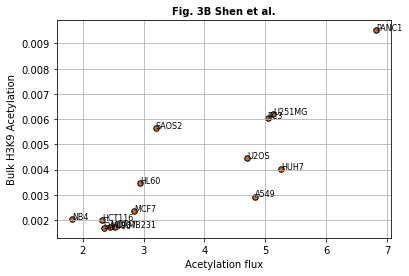

In [214]:
#RESULTADO CON MÉTODO SHEN (FIJANDO VALORES DE CADA MEDIO PARA LAS DIFERENTES LINEAS CELULARES)
x=lista_calculated 
y=acetlevel[0,:]


plt.scatter(x,y,color="chocolate",edgecolors='black',s=30)
plt.title('Fig. 3B Shen et al.',fontsize = 10,fontweight = "bold")
plt.xlabel('Acetylation flux')
plt.ylabel('Bulk H3K9 Acetylation')

r=stats.pearsonr(x, y)

print("Coef. Pearson:")
print(r)

for i in range(14):
    plt.text(x[i],y[i],lista_line[i],fontsize = 8)
    



plt.grid()
plt.show()

Coef. Pearson:
(0.4006535107011391, 0.15571088494985835)


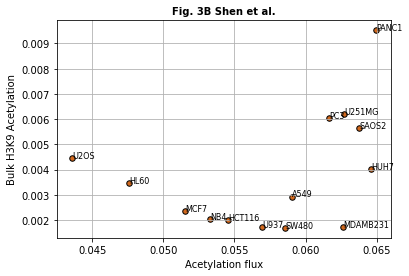

In [215]:
#RESULTADO SOLO CON FLUJOS DE R_EX_PAC
#Ejes
x=lista_PAC #En eje "x" flujo de proteina acetilada (por transcriptomica) -RNA-seq CCLE2019
y=acetlevel[0,:] #En eje "y" nivel de acetilacion de la marca H3K9ac (por epigenetica) -CMA

#Leyendas del grafico
plt.scatter(x,y,color="chocolate",edgecolors='black',s=30)
plt.title('Fig. 3B Shen et al.',fontsize = 10,fontweight = "bold")
plt.xlabel('Acetylation flux')
plt.ylabel('Bulk H3K9 Acetylation')

#Nombres de cada linea celular
for i in range(14):
    plt.text(x[i],y[i],lista_line[i],fontsize = 8)

#Coef. Pearson    
r=stats.pearsonr(x, y)
print("Coef. Pearson:")
print(r)

plt.grid()
plt.show()

